In [14]:
import numpy as np
import pandas as pd
from google.colab import files
import cv2
import os

In [15]:
print("Please choose an image to upload.")
uploaded = files.upload()
img_root = "Images/"
os.makedirs(img_root, exist_ok=True)
img_name = "testImage.jpg"
for file_name in uploaded.keys():
    img_path = os.path.join(img_root, img_name)
    with open(img_path, "wb") as f:
        f.write(uploaded[file_name])
    print(f"Image saved at: {img_path}")

img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
if img is not None:
    print("Image successfully read.")
else:
    print("Failed to read the image.")

Please choose an image to upload.


Saving italy-mountains-dawn-daybreak-147411.jpeg to italy-mountains-dawn-daybreak-147411.jpeg
Image saved at: Images/testImage.jpg
Image successfully read.


Displaying the filtered image with Domain Filter:


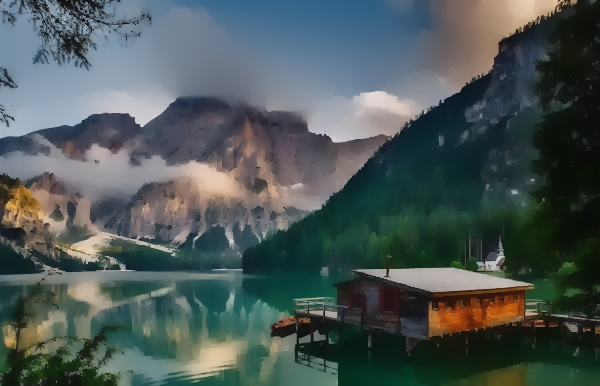

In [16]:
from google.colab.patches import cv2_imshow

domainFilter = cv2.edgePreservingFilter(img, flags=1, sigma_s=60, sigma_r=0.6)

print("Displaying the filtered image with Domain Filter:")
cv2_imshow(domainFilter)

Displaying the original and Gaussian smoothed images side by side:


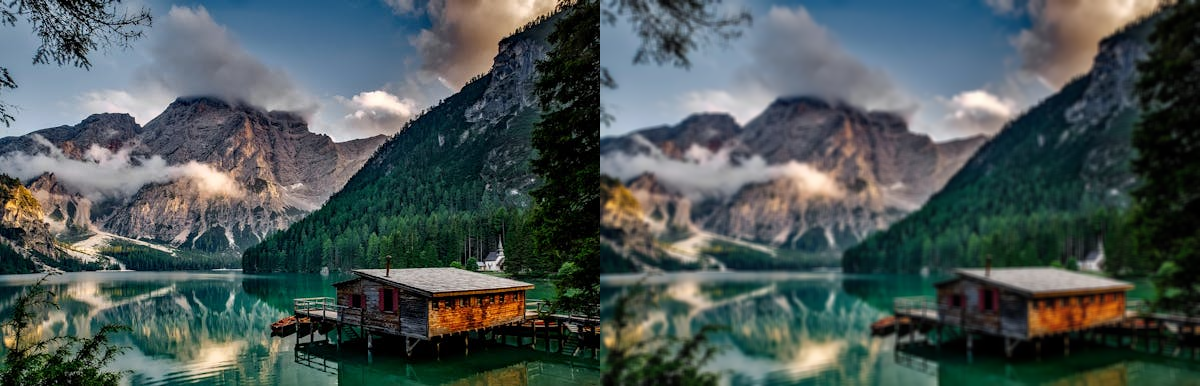

In [17]:
from google.colab.patches import cv2_imshow

gaussBlur = cv2.GaussianBlur(img, (5, 5), cv2.BORDER_DEFAULT)

result = np.hstack((img, gaussBlur))
print("Displaying the original and Gaussian smoothed images side by side:")
cv2_imshow(result)


Displaying the original and mean-filtered images side by side:


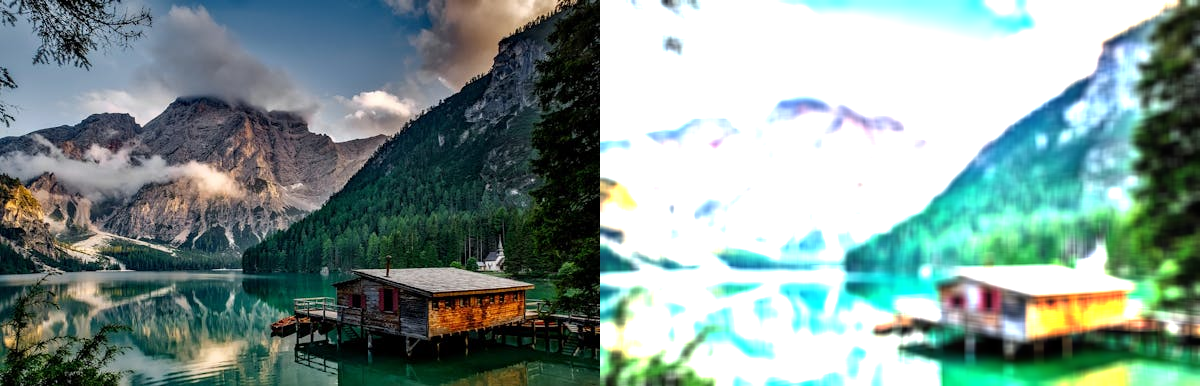

In [18]:
from google.colab.patches import cv2_imshow
kernel = np.ones((10, 10), np.float32) / 25
meanFilter = cv2.filter2D(img, -1, kernel)
result = np.hstack((img, meanFilter))
print("Displaying the original and mean-filtered images side by side:")
cv2_imshow(result)


Displaying the original and median-filtered images side by side:


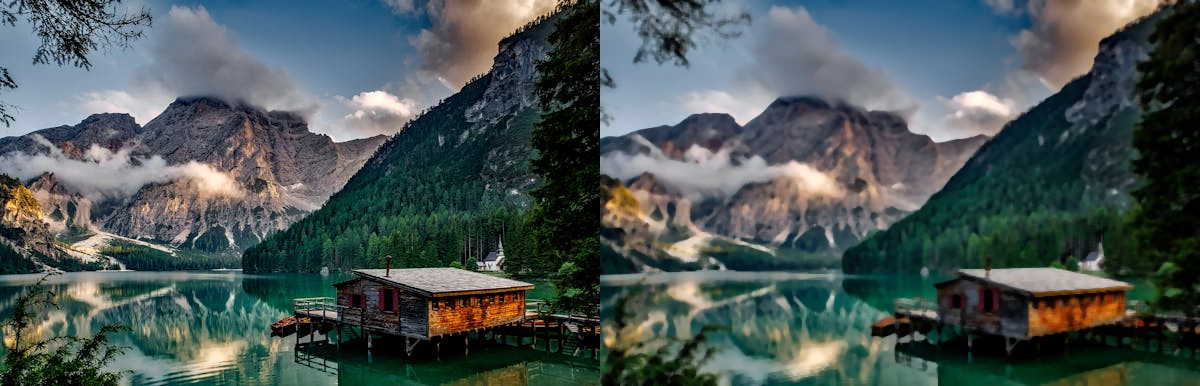

In [19]:
from google.colab.patches import cv2_imshow
medianFilter = cv2.medianBlur(img, 5)
result = np.hstack((img, medianFilter))
print("Displaying the original and median-filtered images side by side:")
cv2_imshow(result)

Bilateral Filter
Displaying the original and bilateral-filtered images side by side:


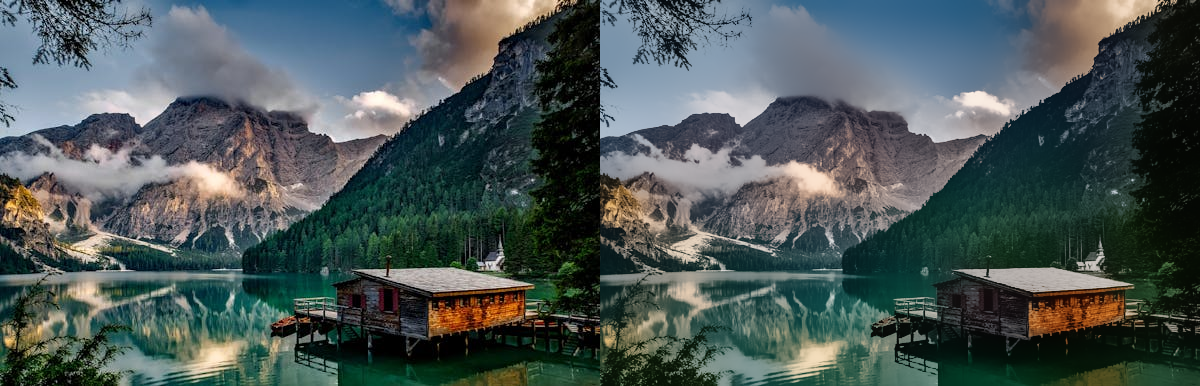

In [20]:
from google.colab.patches import cv2_imshow
print("Bilateral Filter")
bilFil = cv2.bilateralFilter(img, 60, 60, 60)
result = np.hstack((img, bilFil))
print("Displaying the original and bilateral-filtered images side by side:")
cv2_imshow(result)


Bilateral Filter
Displaying the original and bilateral-filtered images side by side:


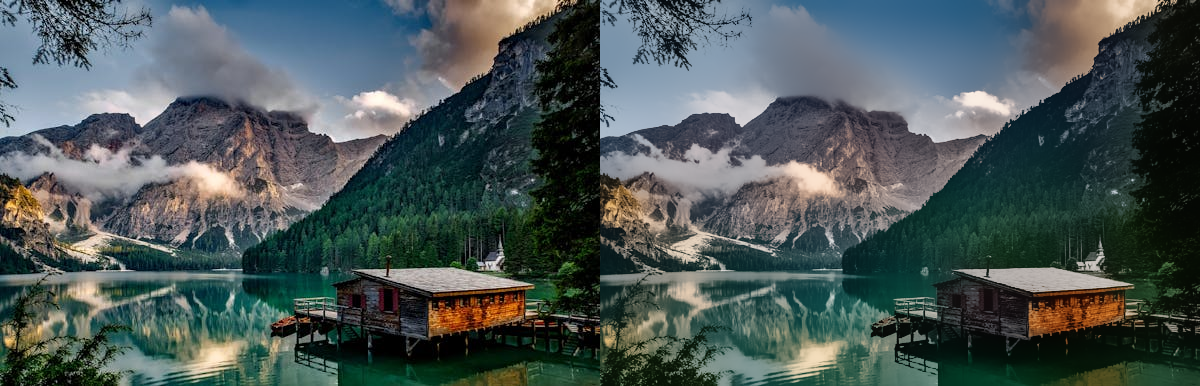

In [21]:
from google.colab.patches import cv2_imshow
print("Bilateral Filter")

# Convert the image to 3 channels (BGR) if it has more than 3 channels
if img.shape[2] > 3:
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

bilFil = cv2.bilateralFilter(img, 60, 60, 60)
result = np.hstack((img, bilFil))
print("Displaying the original and bilateral-filtered images side by side:")
cv2_imshow(result)

Displaying the original and high-pass filtered images side by side:


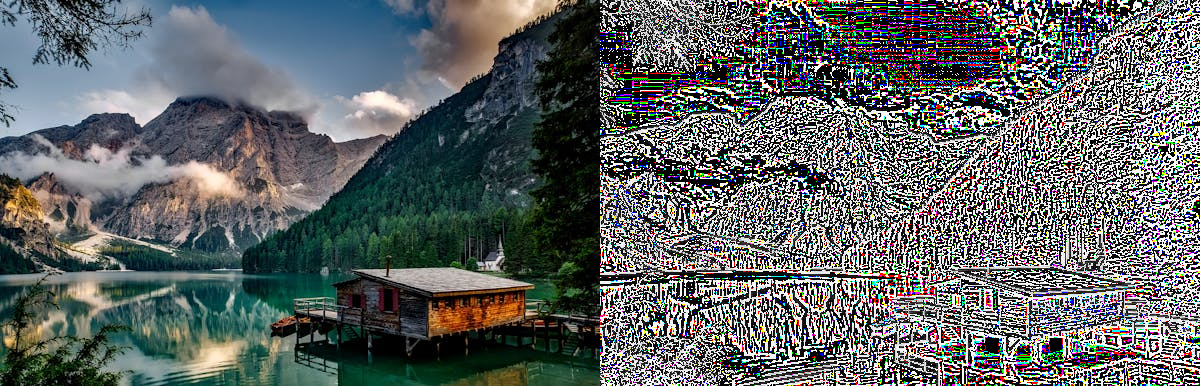

In [22]:
from google.colab.patches import cv2_imshow
highPass = img - gaussBlur
result = np.hstack((img, highPass))
print("Displaying the original and high-pass filtered images side by side:")
cv2_imshow(result)


Displaying the original and low-pass filtered images side by side:


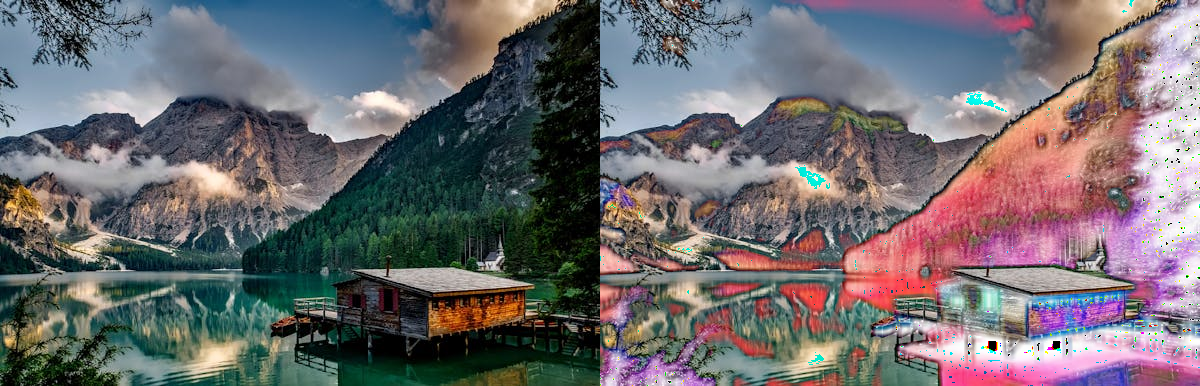

In [23]:
from google.colab.patches import cv2_imshow
lowPass = cv2.filter2D(img, -1, kernel)

lowPass = img - lowPass

result = np.hstack((img, lowPass))
print("Displaying the original and low-pass filtered images side by side:")
cv2_imshow(result)
